In [1]:
import base64
import urllib.request
import pandas as pd

try:
    import json
except ImportError:
    import simplejson as json

class Mixpanel(object):

    ENDPOINT = 'https://mixpanel.com/api'
    VERSION = '2.0'

    def __init__(self, api_secret):
        self.api_secret = api_secret

    def request(self, methods, params, http_method='GET', format='json'):
        """
            methods - List of methods to be joined, e.g. ['events', 'properties', 'values']
                      will give us http://mixpanel.com/api/2.0/events/properties/values/
            params - Extra parameters associated with method
        """

        request_url = '/'.join([self.ENDPOINT, str(self.VERSION)] + methods)
        if http_method == 'GET':
            data = None
            request_url = request_url + '/?' + self.unicode_urlencode(params)
        else:
            data = self.unicode_urlencode(params)

        auth = base64.b64encode(self.api_secret).decode("ascii")
        headers = {'Authorization': 'Basic {encoded_secret}'.format(encoded_secret=auth)}

        request = urllib.request.Request(request_url, data, headers)
        response = urllib.request.urlopen(request, timeout=120)
        str_response = response.read().decode('utf8')
        lines = str_response.splitlines(True)
        records = []
        for line in lines:
            obj = json.loads(line)
            records.append(obj)
        return records

    def unicode_urlencode(self, params):
        """
            Convert lists to JSON encoded strings, and correctly handle any
            unicode URL parameters.
        """
        if isinstance(params, dict):
            params = list(params.items())
        for i,param in enumerate(params):
            if isinstance(param[1], list):
                params.remove(param)
                params.append ((param[0], json.dumps(param[1]),))

        return urllib.parse.urlencode(
            [(k, v) for k, v in params]
        )

In [33]:

# api
encoded_secret = b'8ad9447dce21e1857ce467dd6b86265a'
api = Mixpanel(api_secret=encoded_secret)

# date
from_date = '2018-01-01'
to_date = '2018-03-31'

# Event List
event_list = ['Clicked Apply P2P Invest','Clicked Apply P2P Loan']
event_result_values = {}

In [34]:
for event in event_list:
    data = api.request(['segmentation'], {
        'event': event,
        'from_date': from_date,
        'to_date': to_date
    })
    event_result_values[event] = (list(data[0]['data']['values'][event].values()))
event_result_values

{'Clicked Apply P2P Invest': [3,
  13,
  13,
  9,
  25,
  20,
  19,
  16,
  12,
  30,
  26,
  13,
  12,
  32,
  28,
  18,
  9,
  51,
  35,
  54,
  30,
  7,
  18,
  19,
  8,
  17,
  10,
  12,
  6,
  11,
  13,
  6,
  4,
  9,
  6,
  15,
  15,
  6,
  10,
  99,
  14,
  30,
  26,
  14,
  26,
  13,
  9,
  15,
  23,
  7,
  14,
  16,
  43,
  33,
  33,
  30,
  11,
  25,
  6,
  3,
  3,
  5,
  8,
  0,
  5,
  7,
  1,
  4,
  35,
  17,
  21,
  30,
  22,
  4,
  47,
  60,
  12,
  11,
  23,
  18,
  5,
  4,
  9,
  19,
  6,
  26,
  20,
  10,
  60,
  29],
 'Clicked Apply P2P Loan': [18,
  3,
  20,
  24,
  31,
  35,
  19,
  7,
  10,
  7,
  16,
  19,
  24,
  19,
  18,
  6,
  6,
  30,
  17,
  13,
  6,
  29,
  35,
  26,
  19,
  8,
  38,
  34,
  12,
  20,
  27,
  23,
  35,
  18,
  15,
  3,
  23,
  11,
  19,
  27,
  6,
  41,
  44,
  22,
  24,
  5,
  4,
  42,
  50,
  12,
  7,
  13,
  19,
  15,
  42,
  17,
  14,
  29,
  21,
  6,
  2,
  0,
  0,
  5,
  23,
  21,
  4,
  25,
  25,
  11,
  20,
  25,
  23,
  6,
  8,
  1

In [41]:
# data frame 생성
to_date = to_date.replace('-','')
from_date = from_date.replace('-','')
date = pd.date_range(from_date, to_date)

df = pd.DataFrame(event_result_values, index=date)
# np.random.randn(6,4)
df


,Clicked Apply P2P Invest,Clicked Apply P2P Loan
2018-01-01,3,18
2018-01-02,13,3
2018-01-03,13,20
2018-01-04,9,24
2018-01-05,25,31
2018-01-06,20,35
2018-01-07,19,19
2018-01-08,16,7
2018-01-09,12,10
2018-01-10,30,7


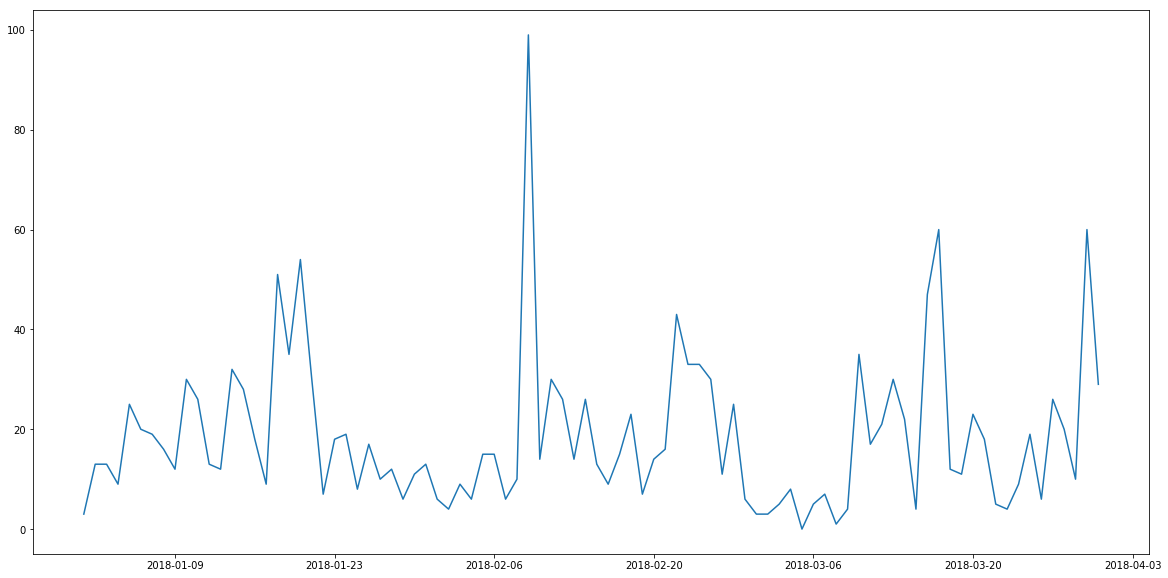

In [52]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(date,df['Clicked Apply P2P Invest'].tolist())
